FINAL PROJECT

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import mols2grid
import rdkit.Chem.MolStandardize 
from rdkit.Chem.MolStandardize import rdMolStandardize

## Import data:

In [68]:
#reading file and changing columns names
df = pd.read_csv("mmc53.csv")
df.rename(columns = {'PC ': 'Packing coefficient', ' solid C': 'solid C', 'Type1': 'Type of the weakest bond', 'Length1 ': 'Length of the weakest bond', 'Strength 1': 'Strength of the weakest bond', 'HB amount' : 'Hydrogen bond area' , 'OB' : 'Oxygen balance (fraction)', 'Nm' : 'Number of molecules in each primitive cell', 'Qmax' : 'Qmax: Maxmimum heat of explosion', 'D': 'Detonation velocity','pC-J': 'Detonation pressure', 'LE': 'Lattice energy'}, inplace = True) # value of copy is ignored
#df.head()

In [69]:
df

,SMILES,Packing coefficient,Nitrogen density (g/cm3),Oxygen balance (fraction),Number of molecules in each primitive cell,Hydrogen bond area,strongest HB length,strongest HB strength,gasous N2,gasous H2O,...,solid C,gasous NH3,gasous O2,Type of the weakest bond,Length of the weakest bond,Strength of the weakest bond,Qmax: Maxmimum heat of explosion,Detonation velocity,Detonation pressure,Lattice energy
0,NC(N)=C(N(=O)=O)N(=O)=O,78.80,0.73,-21.60,8,94.20,1.87,13.81,33.33,33.33,...,16.67,0.0,0.00,N-C,1.43,121.69,956.21,8.24,31.83,33.97
1,O=N(=O)N(CC(N(=O)=O)(N(=O)=O)N(=O)=O)CC(N(=O)=...,74.90,0.57,16.50,4,64.20,2.13,4.54,33.33,16.67,...,0.00,0.0,16.67,C-C,1.53,85.66,1061.80,8.59,35.08,18.83
2,Nc1c(c(N)c(c(N)c1N(=O)=O)N(=O)=O)N(=O)=O,78.20,0.64,-55.80,2,110.10,2.31,4.29,25.00,25.00,...,37.50,0.0,0.00,N-C,1.43,124.08,889.40,7.68,28.17,30.17
3,CN(=O)=O,69.50,0.34,-39.30,4,61.80,2.27,3.35,16.67,50.00,...,25.00,0.0,0.00,N-C,1.50,90.05,1276.30,7.46,22.28,14.97
4,NC(N)=C(N(=O)=O)N(=O)=O,80.00,0.74,-21.60,4,90.20,2.03,8.30,33.33,33.33,...,16.67,0.0,0.00,N-C,1.43,120.02,951.90,8.32,32.80,34.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,74.80,0.61,-34.30,16,106.40,2.21,4.27,29.17,20.83,...,27.08,0.0,0.00,C-C,1.59,88.64,1343.70,8.39,32.64,50.84
111,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,0.00,0.57,-54.80,6,104.80,2.21,4.23,24.14,34.48,...,34.48,0.0,0.00,C-C,1.61,86.35,1151.50,7.56,24.93,73.05
112,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,69.30,0.50,-73.30,12,115.70,1.76,17.10,19.44,36.11,...,41.67,0.0,0.00,C-C,1.54,76.29,1044.10,6.99,20.77,72.63/72.61
113,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,77.70,0.69,-13.60,6,125.90,1.99,6.38,38.10,23.81,...,11.91,0.0,0.00,C-C,1.59,88.61,1401.30,8.64,33.98,30.65


## Exploratory data analysis and visualization (identify NA, outliers, missing data)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SMILES                                      115 non-null    object 
 1   Packing coefficient                         114 non-null    float64
 2   Nitrogen density (g/cm3)                    115 non-null    float64
 3   Oxygen balance (fraction)                   115 non-null    float64
 4   Number of molecules in each primitive cell  115 non-null    int64  
 5   Hydrogen bond area                          113 non-null    float64
 6   strongest HB length                         115 non-null    float64
 7   strongest HB strength                       115 non-null    float64
 8   gasous N2                                   115 non-null    float64
 9   gasous H2O                                  115 non-null    float64
 10  gasous CO2    

<AxesSubplot: >

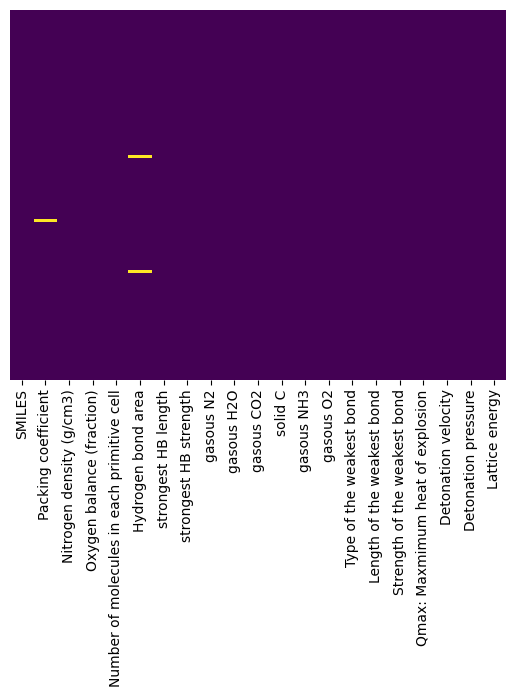

In [71]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [72]:
print(df.isnull().sum()) 

SMILES                                        0
Packing coefficient                           1
Nitrogen density (g/cm3)                      0
Oxygen balance (fraction)                     0
Number of molecules in each primitive cell    0
Hydrogen bond area                            2
strongest HB length                           0
strongest HB strength                         0
gasous N2                                     0
gasous H2O                                    0
gasous CO2                                    0
solid C                                       0
gasous NH3                                    0
gasous O2                                     0
Type of the weakest bond                      0
Length of the weakest bond                    0
Strength of the weakest bond                  0
Qmax: Maxmimum heat of explosion              0
Detonation velocity                           0
Detonation pressure                           0
Lattice energy                          

In [73]:
df.describe()

,Packing coefficient,Nitrogen density (g/cm3),Oxygen balance (fraction),Number of molecules in each primitive cell,Hydrogen bond area,strongest HB length,strongest HB strength,gasous N2,gasous H2O,gasous CO2,solid C,gasous NH3,gasous O2,Length of the weakest bond,Strength of the weakest bond,Qmax: Maxmimum heat of explosion,Detonation velocity,Detonation pressure
count,114.000000,115.000000,115.000000,115.000000,113.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,6213.249474,0.563913,-48.520435,4.991304,112.142566,2.153478,8.515913,26.021217,21.643043,18.735043,32.746000,0.359826,0.495304,1.737043,93.070870,1173.769913,7.628783,26.572435
std,65554.119241,0.193167,30.348448,3.102053,41.292741,0.268211,8.569087,9.031212,8.798278,10.041111,14.913736,2.485651,3.768247,1.550388,17.013455,222.938221,0.804775,6.155695
min,0.000000,0.210000,-139.300000,1.000000,28.700000,1.420000,0.510000,7.140000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350000,43.080000,450.800000,5.380000,10.910000
25%,72.460000,0.425000,-64.295000,4.000000,91.700000,1.955000,2.630000,20.000000,15.190000,11.110000,21.130000,0.000000,0.000000,1.460000,86.005000,1045.700000,7.155000,22.475000
50%,74.070000,0.580000,-46.600000,4.000000,108.900000,2.230000,4.270000,26.670000,20.830000,18.330000,34.480000,0.000000,0.000000,1.480000,96.840000,1244.500000,7.630000,26.430000
75%,75.975000,0.700000,-26.080000,8.000000,134.630000,2.350000,12.995000,33.330000,26.920000,25.500000,41.990000,0.000000,0.000000,1.530000,103.190000,1329.750000,8.245000,31.080000
max,700000.000000,1.190000,37.070000,16.000000,284.780000,2.590000,31.460000,45.450000,50.000000,42.310000,67.860000,22.220000,36.840000,13.020000,124.080000,1499.500000,9.280000,41.610000


### Table analysis:
Packing coefficient has 1 missing value, HB amount has 2 missing values.
 
Why LE (lattice energy (kcal/mol)) is object dtype? 

Outliers in packing coefficient column

### CHANGING DTYPE:

In [74]:
df['Type of the weakest bond'].unique()

array(['N-C', 'C-C', 'N-C ', 'O-C', 'C-C ', 'N-N', 'O-N', ' O-C'],
      dtype=object)

In [75]:
# Type of the weakest bond columns
df.loc[(df['Type of the weakest bond'] == 'C-C '), ['Type of the weakest bond']] = 'C-C'
df.loc[(df['Type of the weakest bond'] == 'N-C '), ['Type of the weakest bond']] = 'N-C'
df.loc[(df['Type of the weakest bond'] == ' O-C'), ['Type of the weakest bond']] = 'O-C'
#df['Type of the weakest bond'].unique()

#Converting Object to Float, 'Lattice energy' column 
df.loc[(df['Lattice energy'] == '72.63/72.61'), ['Lattice energy']] = '72.62'
df['Lattice energy'] = pd.to_numeric(df['Lattice energy'])
#df.info()

### OUTLIERS

<AxesSubplot: >

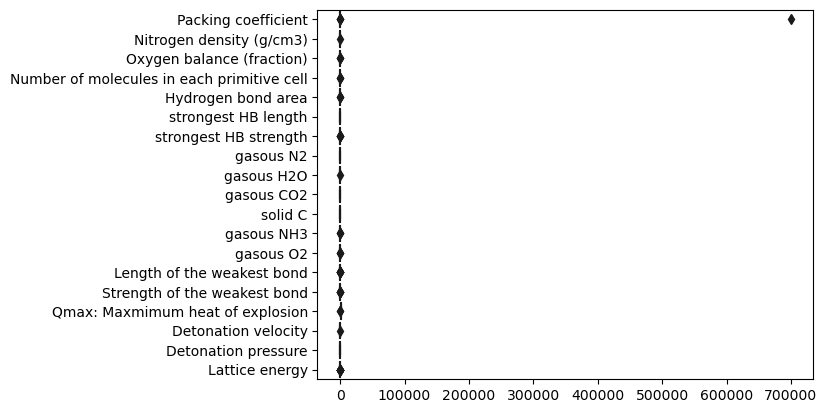

In [76]:
sns.boxplot(data=df, orient="h", palette='PuBuGn')

In [77]:
#deleting the row with strange value of Packing coefficient
df = df[df['Packing coefficient'] !=  700000]
df = df[df['Packing coefficient'] !=  0]

<AxesSubplot: >

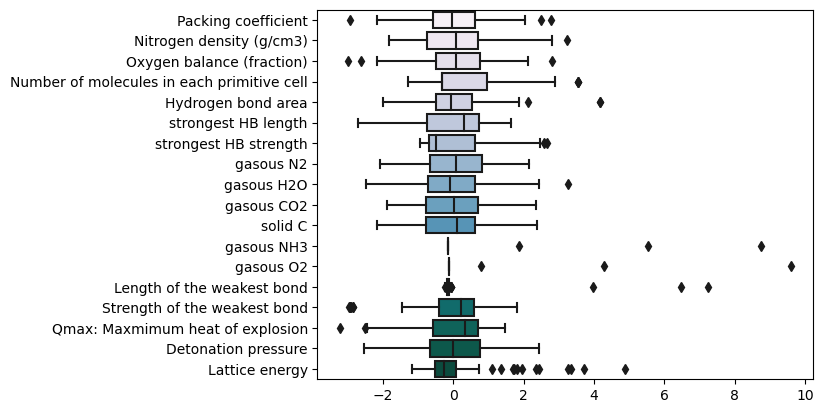

In [78]:
from sklearn.preprocessing import StandardScaler
df_pca = df.drop(labels = ['SMILES', 'Type of the weakest bond', 'Detonation velocity'], axis = 1)
sc = StandardScaler()
df_pca_transformed = sc.fit_transform(df_pca)

scaled_data = pd.DataFrame(df_pca_transformed, columns = list(df_pca.columns))

ax_new = sns.boxplot(data = scaled_data, orient='h', palette='PuBuGn')
ax_new

## SMILES CLEANING

In [79]:
mols2grid.display(df, smiles_col="SMILES")

MolGridWidget()

In [80]:
#cleaning SMILES
df.loc[(df['SMILES'] == '[O]n1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O'), ['SMILES']] = '[O-][N+]1=C([N+]([O-])=O)C=C([N+]([O-])=O)C=C1[N+]([O-])=O'
df.loc[(df['SMILES'] == 'Nc1c(cc(c(N)n1[O])N(=O)=O)N(=O)=O'), ['SMILES']] = 'NC1=[N+](C(N)=C(C=C1[N+]([O-])=O)[N+]([O-])=O)O'

In [81]:
#cleaning mixed compounds
list_of_solvents = ['CN(C)C=O', 'O', 'CC#N', 'C1COCCO1', 'CO', 'C[N+]([O-])=O', 'O=C1OCCC1']

number = 0

for molecule in df['SMILES']:
    
    for item in molecule:
        
        if item == '.':
            number = number + 1
            new_mol = molecule.split(".")
            
            for part in new_mol:
                if part in list_of_solvents:
                    mol = Chem.MolFromSmiles(molecule, sanitize=True)
                    correct_mol = Chem.MolStandardize.rdMolStandardize.FragmentParent(mol)
                    smiles = Chem.MolToSmiles(correct_mol)
                    df.loc[(df['SMILES'] == molecule), ['SMILES']] = smiles

            com = 0 
            dif = 0
            for i in new_mol[:-1]:
                for j in new_mol[1:]:
                    if i == j:
                        com = com+1
                    else:
                        dif = dif +1
            if dif == 0:
             df.loc[(df['SMILES'] == molecule), ['SMILES']] = new_mol[0]
print(number)

68


[12:43:14] Initializing MetalDisconnector
[12:43:14] Running MetalDisconnector
[12:43:14] Initializing Normalizer
[12:43:14] Running Normalizer
[12:43:14] Running LargestFragmentChooser
[12:43:14] Fragment: CN(C)C=O
[12:43:14] New largest fragment: CN(C)C=O (12)
[12:43:14] Fragment: Nc1c([N+](=O)[O-])cc([N+](=O)[O-])c(C=Cc2ccc(C=Cc3c([N+](=O)[O-])cc([N+](=O)[O-])c(N)c3[N+](=O)[O-])cc2)c1[N+](=O)[O-]
[12:43:14] New largest fragment: Nc1c([N+](=O)[O-])cc([N+](=O)[O-])c(C=Cc2ccc(C=Cc3c([N+](=O)[O-])cc([N+](=O)[O-])c(N)c3[N+](=O)[O-])cc2)c1[N+](=O)[O-] (56)
[12:43:14] Initializing MetalDisconnector
[12:43:14] Running MetalDisconnector
[12:43:14] Initializing Normalizer
[12:43:14] Running Normalizer
[12:43:14] Running LargestFragmentChooser
[12:43:14] Fragment: O
[12:43:14] New largest fragment: O (3)
[12:43:14] Fragment: O=[N+]([O-])N1C2C3N([N+](=O)[O-])C1C1N([N+](=O)[O-])C(C(N1[N+](=O)[O-])N3[N+](=O)[O-])N2[N+](=O)[O-]
[12:43:14] New largest fragment: O=[N+]([O-])N1C2C3N([N+](=O)[O-])C1C1

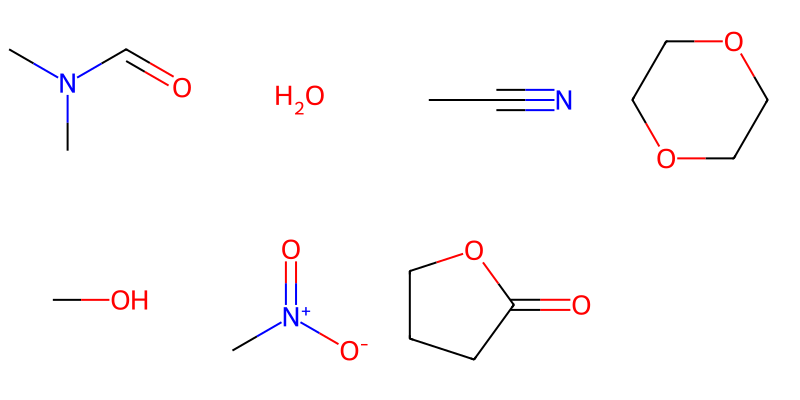

In [82]:
list_of_solvents = ['CN(C)C=O', 'O', 'CC#N', 'C1COCCO1', 'CO', 'C[N+]([O-])=O', 'O=C1OCCC1']
mol_list = []
for smiles in list_of_solvents:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

In [83]:
#cheking left compounds and deleating mixes 
number_1 = 0

for molecule in df['SMILES']:
    
    for item in molecule:
        
        if item == '.':
            number_1 = number_1 + 1
            df = df.loc[df['SMILES'] != molecule]
            
            
print('Number of left mixed compounds', number_1)

Number of left mixed compounds 25


## DUBLICATES

In [84]:
#dublicateRows = df[df.duplicated(['SMILES'])]
duplicateRows = df[df.duplicated('SMILES')]
duplicateRows

,SMILES,Packing coefficient,Nitrogen density (g/cm3),Oxygen balance (fraction),Number of molecules in each primitive cell,Hydrogen bond area,strongest HB length,strongest HB strength,gasous N2,gasous H2O,...,solid C,gasous NH3,gasous O2,Type of the weakest bond,Length of the weakest bond,Strength of the weakest bond,Qmax: Maxmimum heat of explosion,Detonation velocity,Detonation pressure,Lattice energy
4,NC(N)=C(N(=O)=O)N(=O)=O,80.0,0.74,-21.6,4,90.2,2.03,8.30,33.33,33.33,...,16.67,0.0,0.0,N-C,1.43,120.02,951.90,8.32,32.80,34.55
5,NC(N)=C(N(=O)=O)N(=O)=O,74.3,0.72,-21.6,4,88.1,1.92,12.18,33.33,33.33,...,16.67,0.0,0.0,N-C,1.43,119.08,949.02,8.18,31.32,35.01
27,O=N(=O)N1CN(CN(C1)N(=O)=O)N(=O)=O,74.9,0.68,-21.6,8,122.7,2.13,5.07,33.33,33.33,...,16.67,0.0,0.0,N-C,1.47,99.28,1312.10,8.51,32.69,28.27
29,O=N(=O)N1CN(CN(CN(C1)N(=O)=O)N(=O)=O)N(=O)=O,81.3,0.72,-21.6,2,154.4,2.32,2.23,33.33,33.33,...,16.67,0.0,0.0,N-C,7.92,95.58,1300.30,8.84,36.47,37.81
30,O=N(=O)N1CN(CN(CN(C1)N(=O)=O)N(=O)=O)N(=O)=O,74.0,0.66,-21.6,6,141.8,2.34,3.25,33.33,33.33,...,16.67,0.0,0.0,N-C,1.46,101.85,1319.90,8.38,31.27,37.52
32,O=N(=O)N1C2C3N(C1C1N(C(C(N3N(=O)=O)N1N(=O)=O)N...,74.0,0.72,-11.0,4,114.1,2.22,3.91,40.00,20.00,...,10.00,0.0,0.0,C-C,1.59,87.53,1394.80,8.84,36.36,29.96
96,O=[N+]([O-])N1C2C3N([N+](=O)[O-])C1C1N([N+](=O...,71.8,0.35,-81.4,10,103.5,2.00,11.35,13.95,39.54,...,44.19,0.0,0.0,O-C,1.47,81.88,1427.50,8.50,33.24,113.45
112,O=[N+]([O-])N1C2C3N([N+](=O)[O-])C1C1N([N+](=O...,69.3,0.50,-73.3,12,115.7,1.76,17.10,19.44,36.11,...,41.67,0.0,0.0,C-C,1.54,76.29,1044.10,6.99,20.77,72.62


In [85]:
df.drop_duplicates('SMILES', inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 114
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   SMILES                                      92 non-null     object 
 1   Packing coefficient                         91 non-null     float64
 2   Nitrogen density (g/cm3)                    92 non-null     float64
 3   Oxygen balance (fraction)                   92 non-null     float64
 4   Number of molecules in each primitive cell  92 non-null     int64  
 5   Hydrogen bond area                          90 non-null     float64
 6   strongest HB length                         92 non-null     float64
 7   strongest HB strength                       92 non-null     float64
 8   gasous N2                                   92 non-null     float64
 9   gasous H2O                                  92 non-null     float64
 10  gasous CO2     

## Data vizualization

In [87]:
df['molecula'] = [Chem.MolFromSmiles(smiles, sanitize=True) for smiles in df['SMILES']]
bi = {}
df['MorganFingerprint'] = [AllChem.GetMorganFingerprintAsBitVect(picture,2,nBits=1024, bitInfo=bi) for picture in df['molecula']]

In [88]:
mols2grid.display(df, smiles_col="SMILES")

MolGridWidget()

<AxesSubplot: >

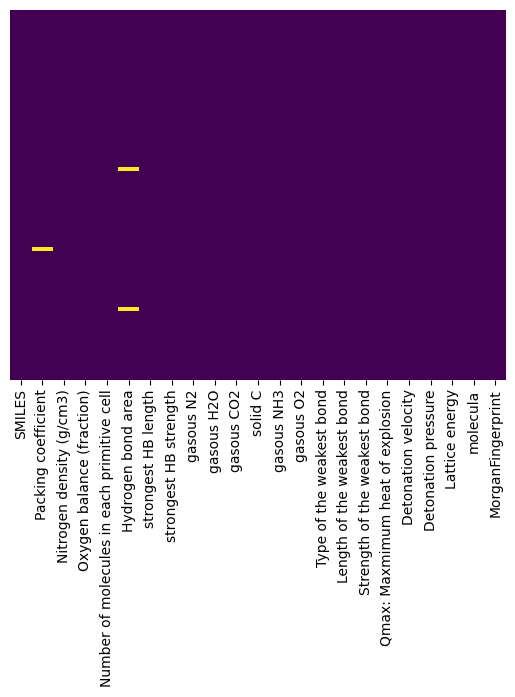

In [89]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## missing value for packing coefficient

There is a missing value in Packing coefficient column for molecule:


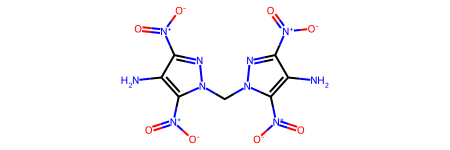

In [90]:
#finding fingerprint of missing value for Packing coefficient
miss_value = df[(df['Packing coefficient'].isnull())]
P = list(miss_value['SMILES'].unique())
fp2 = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(P[0]), 2,nBits=1024, bitInfo=bi)
print('There is a missing value in Packing coefficient column for molecule:')
Chem.MolFromSmiles(P[0], sanitize=True)

In [91]:
#generating new DataFrame for Tanimoto simularity 
tan_sim = df[['SMILES']].copy()

#comparing with other structures
tan_sim['TanimotoSimilarity for Packing coefficient'] = [DataStructs.TanimotoSimilarity(fp2, moll) for moll in df['MorganFingerprint']]
#tan_sim.head()

In [92]:
table_for_sim = tan_sim[tan_sim['TanimotoSimilarity for Packing coefficient']  != 1]
max_value = table_for_sim['TanimotoSimilarity for Packing coefficient'].max()
best_value = table_for_sim[table_for_sim['TanimotoSimilarity for Packing coefficient'] == max_value]
YYY = list(best_value['SMILES'].unique())
YYY

['O=N(=O)C1=NN(CN2N=C(C(=C2N(=O)=O)N(=O)=O)N(=O)=O)C(=C1N(=O)=O)N(=O)=O']

The Tanimoto coefficient is: 0.6451612903225806 for the molecule below, which has the packing coefficient 75.8


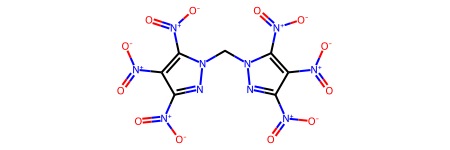

In [93]:
#finding pacing coeficient

ggg = list(df[df['SMILES'] == YYY[0]].index)
pac_coef = df.loc[ggg[0],'Packing coefficient']
#pac_coef

print(f'The Tanimoto coefficient is: {max_value} for the molecule below, which has the packing coefficient {pac_coef}')
Chem.MolFromSmiles(YYY[0], sanitize=True)

<AxesSubplot: >

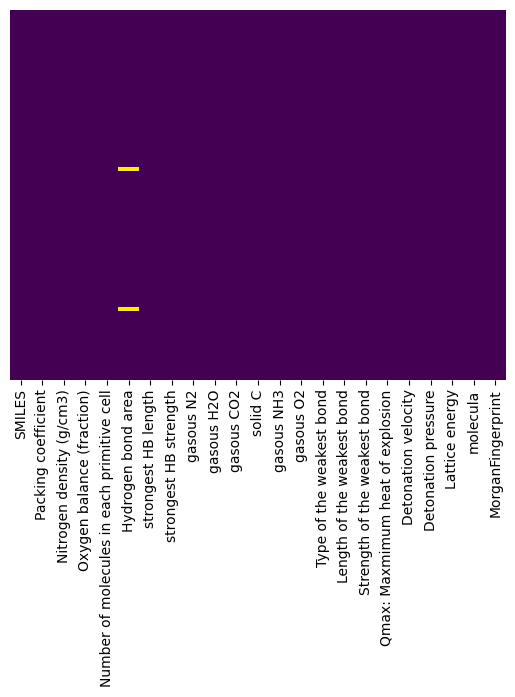

In [94]:
#filling the missing value
df.loc[(df['Packing coefficient'].isnull()), ['Packing coefficient']] = pac_coef
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## missing value for hydrogen bond area 

In [95]:
miss_value_hb = df[(df['Hydrogen bond area'].isnull())]
P_hb = list(miss_value_hb['SMILES'].unique())

new_hydr_values = []
for x in P_hb: 
    fp3_hb = AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(x), 2,nBits=1024, bitInfo=bi)
    tan_sim[x] = [DataStructs.TanimotoSimilarity(fp3_hb, moll) for moll in df['MorganFingerprint']]
    
    #SMILES search
    table_for_simm = tan_sim[tan_sim[x]  != 1]
    max_valuee = table_for_simm[x].max()
    #print(max_valuee)
    best_valuee = table_for_simm[table_for_simm[x] == max_valuee]
    YYYY = list(best_valuee['SMILES'].unique())
    print(f'There is a missing value in Hydrogen bond area column for molecule: {x}, which has a tanimoto simularity coefficient {max_valuee} with the molecule {YYYY[0]}')

    #finding pacing coeficient
    ggg_hb = list(df[df['SMILES'] == YYYY[0]].index)
    hydr_coef = df.loc[ggg_hb[0],'Hydrogen bond area']

    new_hydr_values.append(hydr_coef )

There is a missing value in Hydrogen bond area column for molecule: O=N(=O)c1cc(c(Nc2c(cc(cc2N(=O)=O)N(=O)=O)N(=O)=O)c(c1)N(=O)=O)N(=O)=O, which has a tanimoto simularity coefficient 0.6896551724137931 with the molecule O=N(=O)c1cc(c(Nc2nc(Nc3c(cc(cc3N(=O)=O)N(=O)=O)N(=O)=O)c(cc2N(=O)=O)N(=O)=O)c(c1)N(=O)=O)N(=O)=O
There is a missing value in Hydrogen bond area column for molecule: O=N(=O)C1=NN2CCN3N=C(C(=C3NC2=C1N(=O)=O)N(=O)=O)N(=O)=O, which has a tanimoto simularity coefficient 0.8 with the molecule O=N(=O)C1=NN2CN3N=C(C(=C3NC2=C1N(=O)=O)N(=O)=O)N(=O)=O


<AxesSubplot: >

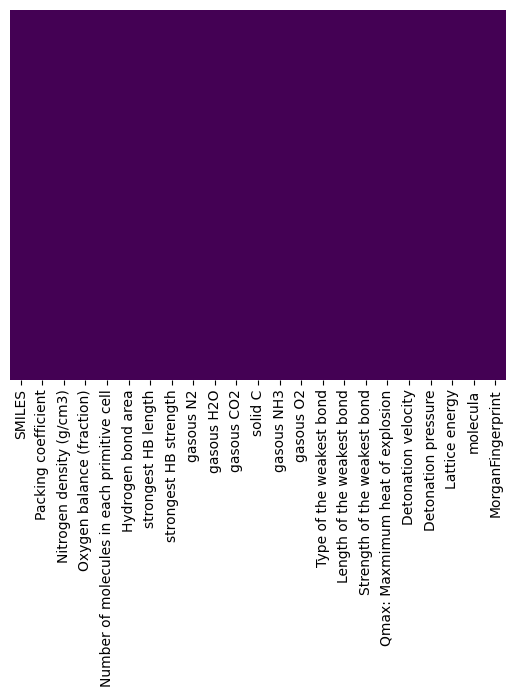

In [96]:
mis_value_ind = df[(df['Hydrogen bond area'].isnull())].index
df.loc[mis_value_ind[0],'Hydrogen bond area'] = new_hydr_values[0]
df.loc[mis_value_ind[1],'Hydrogen bond area'] = new_hydr_values[1]
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Outliers for 'Length of the weakest bond'

In [97]:
df['Length of the weakest bond'].unique()

array([ 1.43,  1.53,  1.5 ,  1.49,  1.52,  1.51,  1.47,  1.56, 11.8 ,
        1.37,  1.54,  1.48,  1.39,  1.61,  1.6 ,  1.46,  1.36,  1.45,
        1.42,  1.35,  1.4 ,  1.44,  1.41, 13.02])

In [98]:
#finding outliers in 'Length of the weakest bond' column 
ddd= df[df['Length of the weakest bond'] > 5]
list_SMILES = list(ddd['SMILES'])

#generating mean value
NN_value = df[(df['Type of the weakest bond'] == 'N-N') & (df['Length of the weakest bond'] < 3)]
length = NN_value['Length of the weakest bond'].mean()
#print(length)

# filling rows with mean value 
for moll in list_SMILES:
    df.loc[(df['SMILES'] == moll), ['Length of the weakest bond']] = length 

## Descriptors

In [99]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors import MolWt
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.Crippen import MolLogP
df['MW'] = [MolWt(x) for x in df['molecula']]
df['LogP'] = [MolLogP(x) for x in df['molecula']]
#df['TPSA'] = [Descriptors.TPSA(x) for x in df['molecula']]

## Data visualization

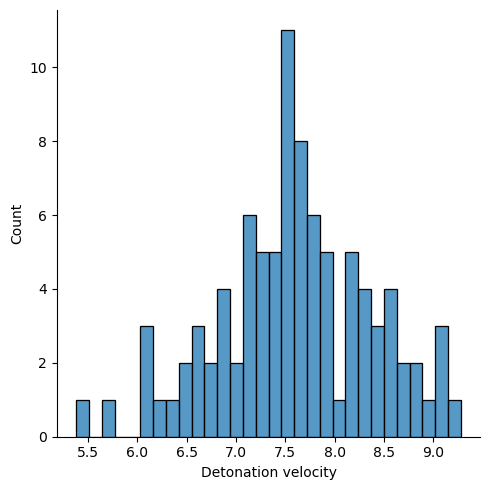

In [100]:
sns.displot(df['Detonation velocity'], kde = False, bins = 30)

/var/folders/m8/v8_kdm011wg6m28tjk9k1lww0000gn/T/ipykernel_91652/1498757723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Detonation velocity'], kde = True, bins = 20)


<AxesSubplot: xlabel='Detonation velocity', ylabel='Density'>

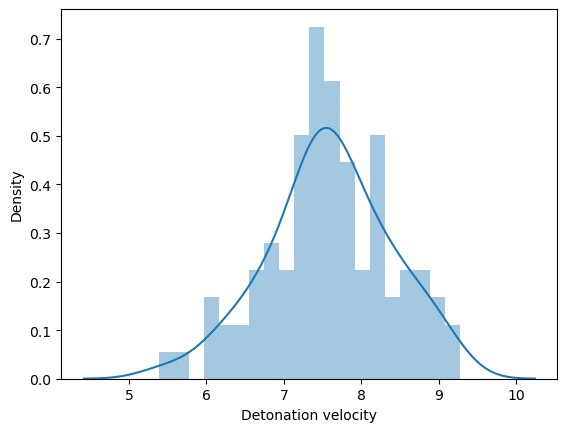

In [101]:
sns.distplot(df['Detonation velocity'], kde = True, bins = 20)


/var/folders/m8/v8_kdm011wg6m28tjk9k1lww0000gn/T/ipykernel_91652/3733395801.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='pearson')


<AxesSubplot: >

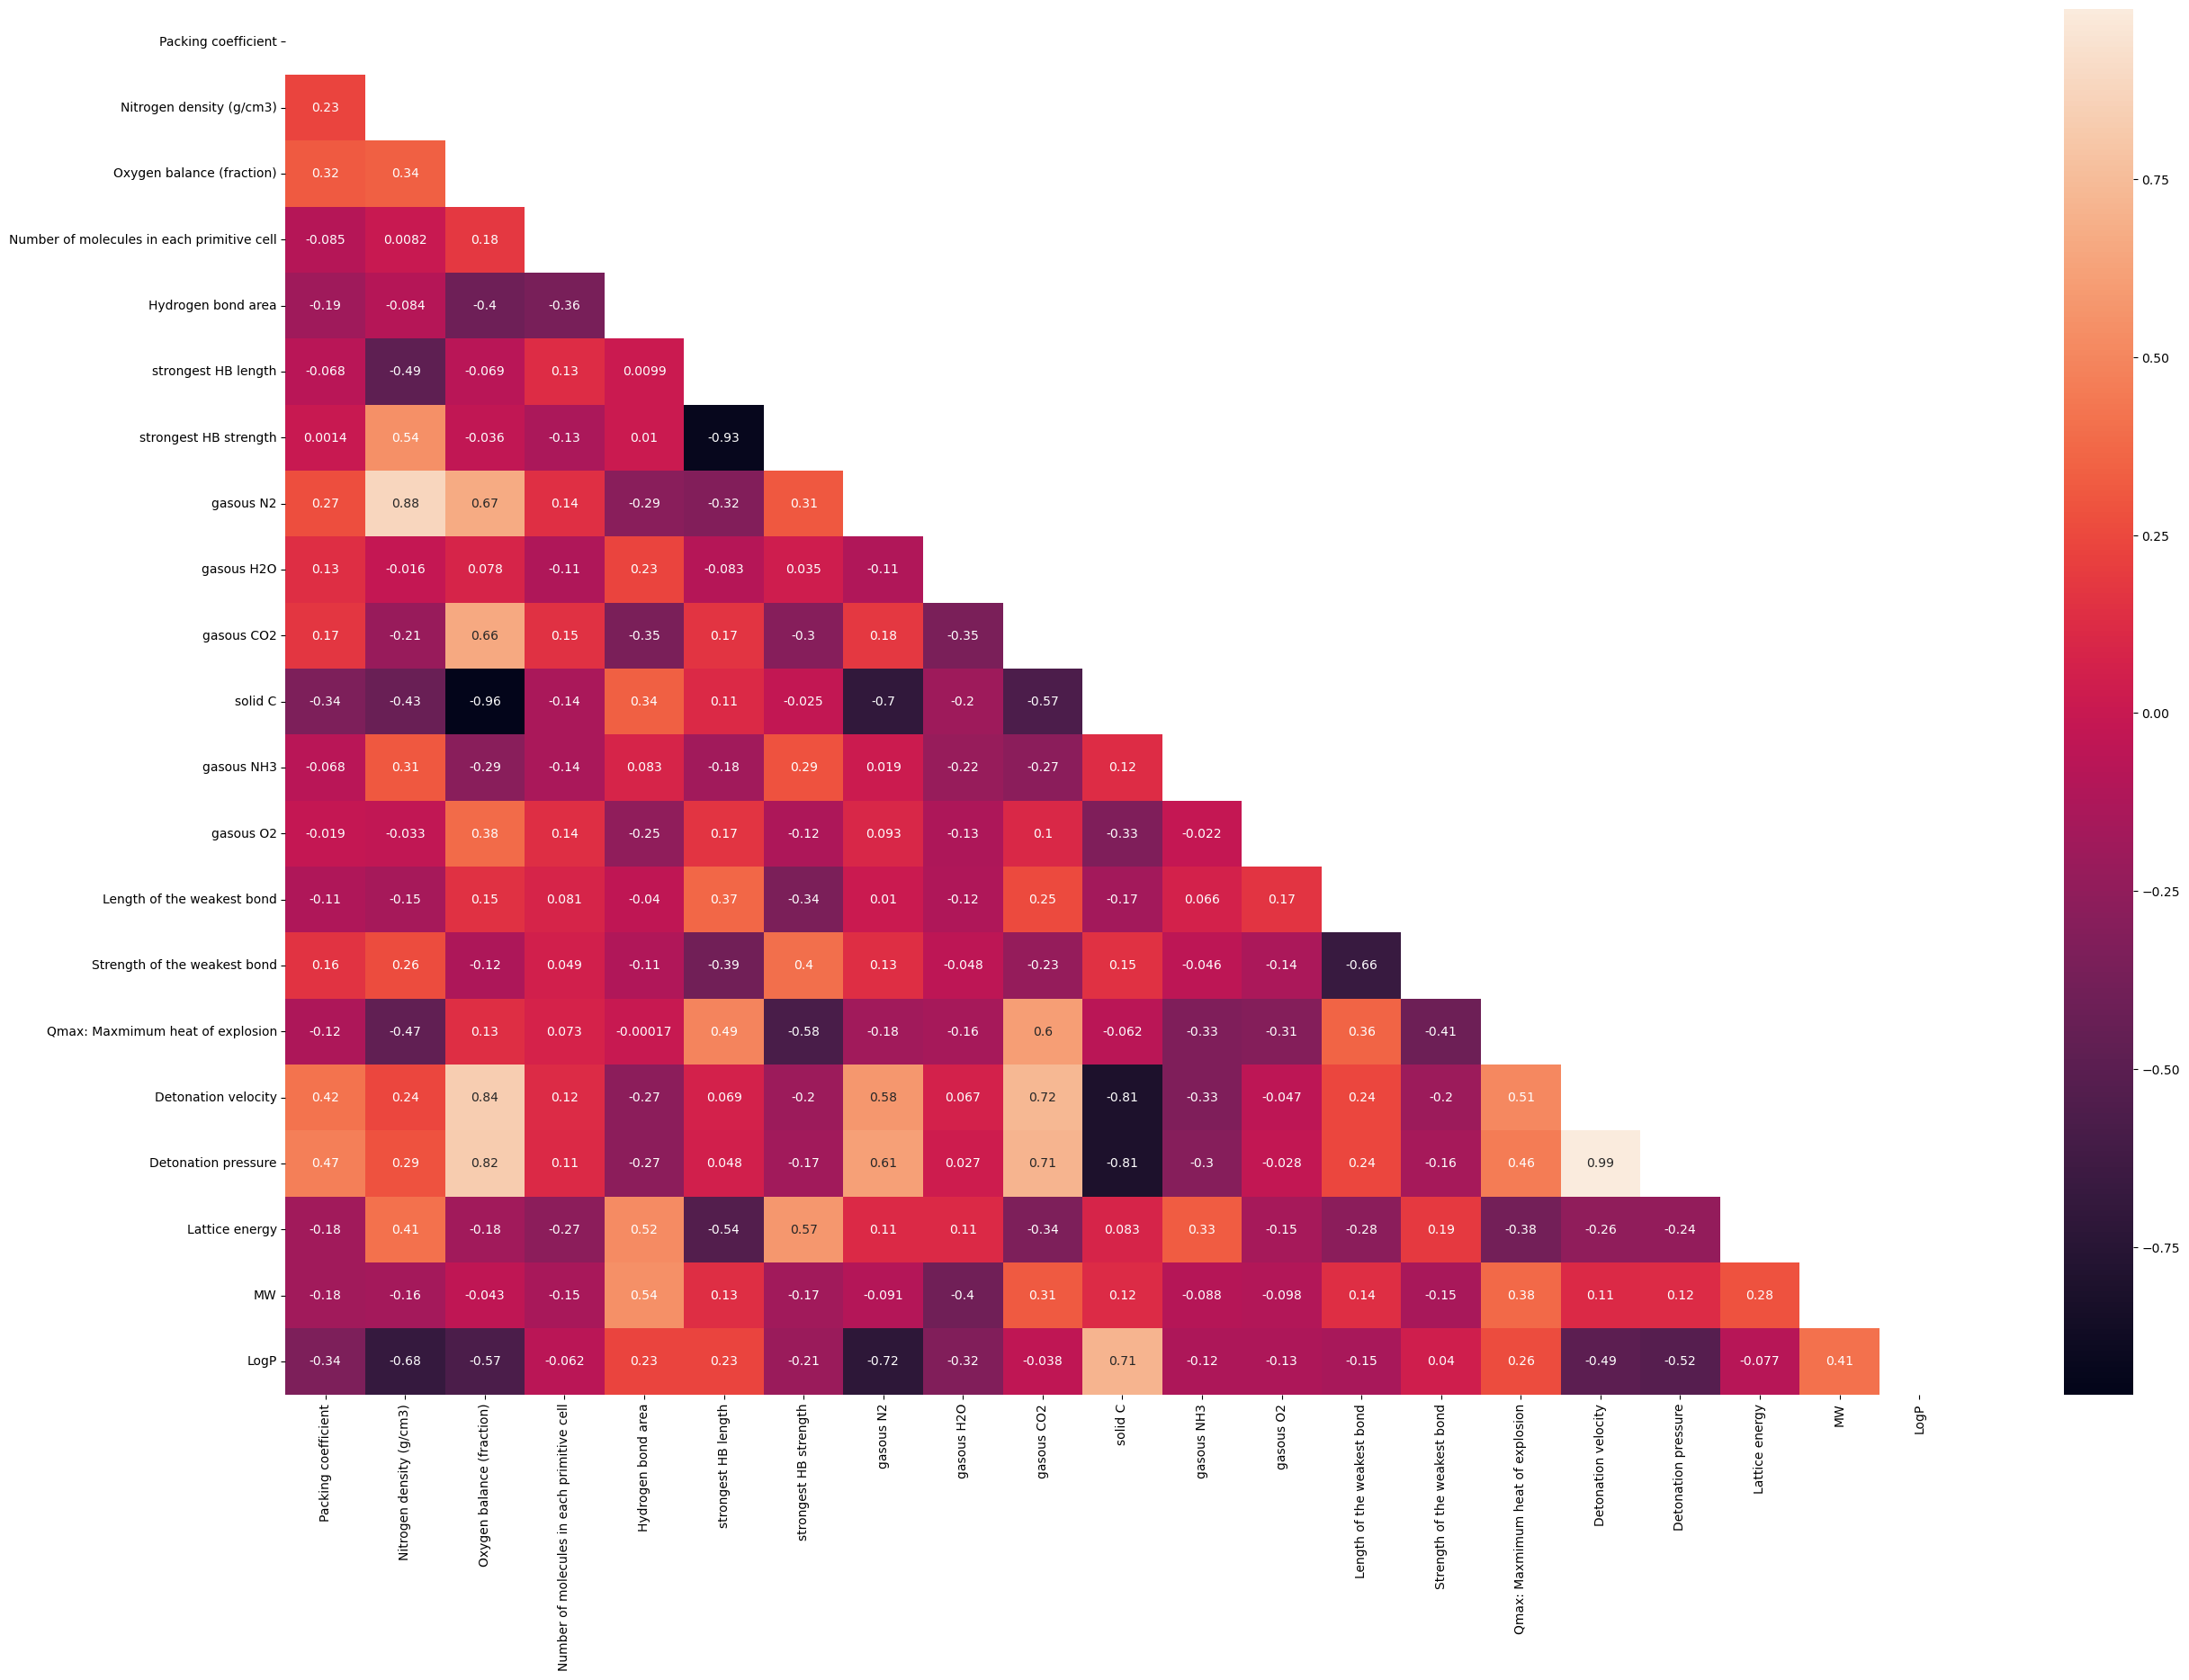

In [102]:
correlation = df.corr(method='pearson')
fig=plt.gcf()
fig.set_size_inches(30, 20)
sns.heatmap(correlation, annot=True, mask = np.triu(np.ones_like(correlation)))

<AxesSubplot: xlabel='Detonation velocity', ylabel='gasous N2'>

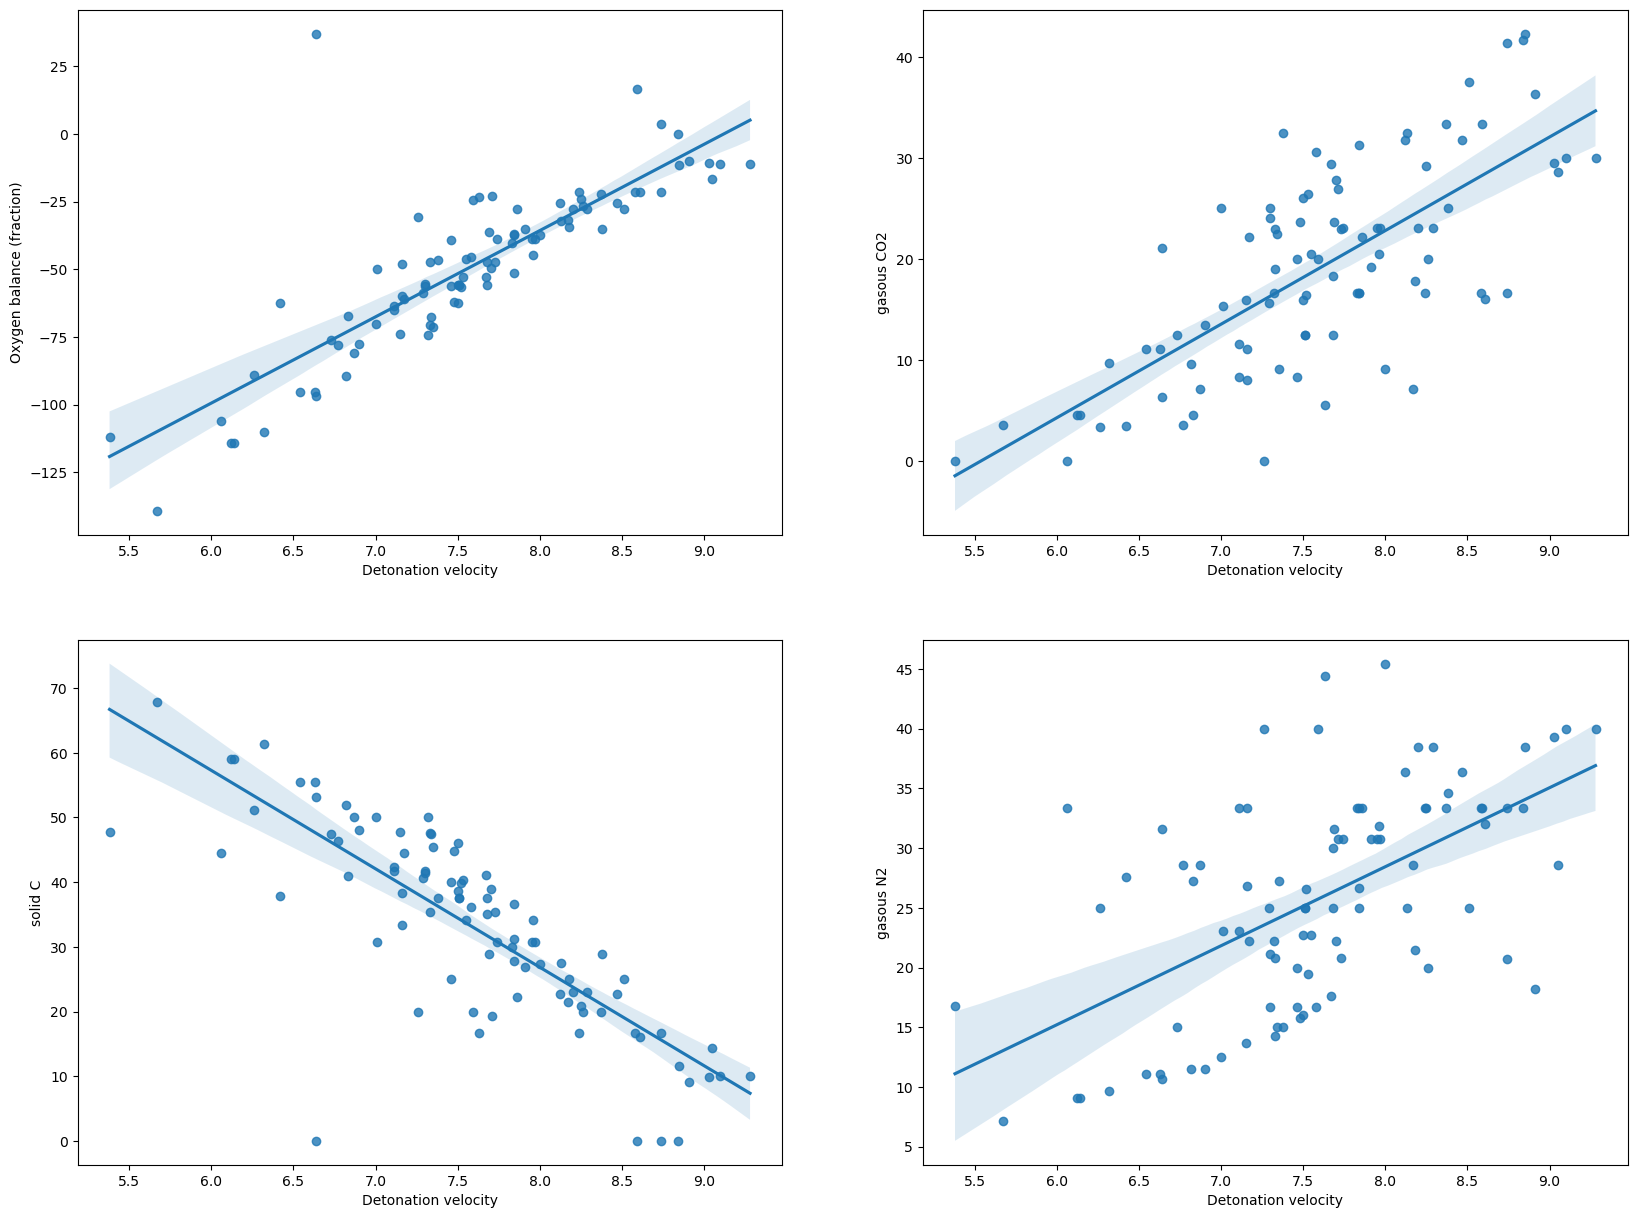

In [103]:
fig, axes = plt.subplots(2, 2, figsize = (20,15))
sns.regplot(ax = axes[0,0], x='Detonation velocity',y= 'Oxygen balance (fraction)',data=df)
sns.regplot(ax = axes[0,1], x='Detonation velocity',y= 'gasous CO2',data=df)
sns.regplot(ax = axes[1,0], x='Detonation velocity',y='solid C',data=df)
sns.regplot(ax = axes[1,1], x='Detonation velocity',y='gasous N2',data=df)

## Data standardization

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

<AxesSubplot: >

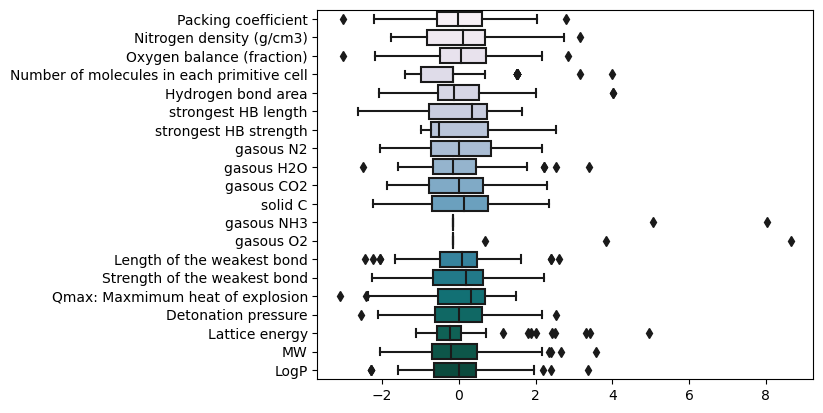

In [105]:
df_pca = df.drop(labels = ['SMILES', 'molecula', 'MorganFingerprint', 'Type of the weakest bond', 'Detonation velocity'], axis = 1)
sc = StandardScaler()
df_pca_transformed = sc.fit_transform(df_pca)

scaled_data = pd.DataFrame(df_pca_transformed, columns = list(df_pca.columns))

ax_new = sns.boxplot(data = scaled_data, orient='h', palette='PuBuGn')
ax_new

In [106]:
# get dummy for 'Type of the weakest bond'column

scaled_data['Type of the weakest bond'] = df['Type of the weakest bond']
new_columns = ['Type of the weakest bond']
scaled_data = pd.get_dummies(scaled_data,columns=new_columns, drop_first= True)
scaled_data


,Packing coefficient,Nitrogen density (g/cm3),Oxygen balance (fraction),Number of molecules in each primitive cell,Hydrogen bond area,strongest HB length,strongest HB strength,gasous N2,gasous H2O,gasous CO2,...,Strength of the weakest bond,Qmax: Maxmimum heat of explosion,Detonation pressure,Lattice energy,MW,LogP,Type of the weakest bond_N-C,Type of the weakest bond_N-N,Type of the weakest bond_O-C,Type of the weakest bond_O-N
0,1.598706,0.844262,0.904261,1.507689,-0.516091,-0.971767,0.525551,0.839867,1.425728,-0.230145,...,2.032024,-0.880049,0.915403,-0.118373,-1.311507,-0.869225,1,0,0,0
1,0.219690,0.039891,2.169032,-0.153477,-1.229551,-0.023392,-0.523068,0.839867,-0.527753,1.420136,...,-0.884382,-0.417633,1.452628,-0.861643,0.710173,-1.481893,0,0,0,0
2,1.386550,0.391803,-0.231045,-0.984061,-0.137956,0.633175,-0.551348,-0.079094,0.448987,-0.643210,...,2.225480,-1.172633,0.310405,-0.304927,-0.384452,-0.020260,1,0,0,0
3,-1.689718,-1.116394,0.316691,-0.153477,-1.286628,0.487271,-0.657680,-0.998056,3.380380,-1.056276,...,-0.529038,0.521736,-0.663213,-1.051143,-2.044564,-0.163138,1,0,0,0
4,-0.169264,-0.814754,0.734961,-0.153477,1.115356,0.450795,-0.790030,-0.630692,2.207823,0.099713,...,-2.253951,0.830480,0.629434,-0.404586,-0.536238,-0.700457,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.028749,-0.714208,-1.599055,-1.399352,4.016287,0.742603,-0.498181,-1.663283,1.010642,-1.249436,...,0.172745,-0.177207,-1.213662,3.321092,2.160031,1.460306,1,0,0,0
88,-3.012160,1.196175,-2.096000,-0.984061,2.001474,-1.883666,2.313973,-0.982611,0.008106,-1.881416,...,1.083363,-2.192145,-2.542674,4.956876,0.272838,-0.749162,1,0,0,0
89,-1.297229,0.090164,-0.255942,0.677106,0.526989,0.341367,-0.652024,0.093004,-0.466780,-0.255899,...,-1.303670,0.457360,-0.178883,0.323956,0.306325,0.106600,1,0,0,0
90,-2.220110,0.190710,-1.341786,-0.153477,1.303948,-0.898815,1.494987,-0.079094,-0.084526,-1.543634,...,0.287685,-0.559962,-1.689726,0.673990,0.492070,-0.021878,0,1,0,0


## PCA

In [107]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

<AxesSubplot: title={'center': '2 Component PCA'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

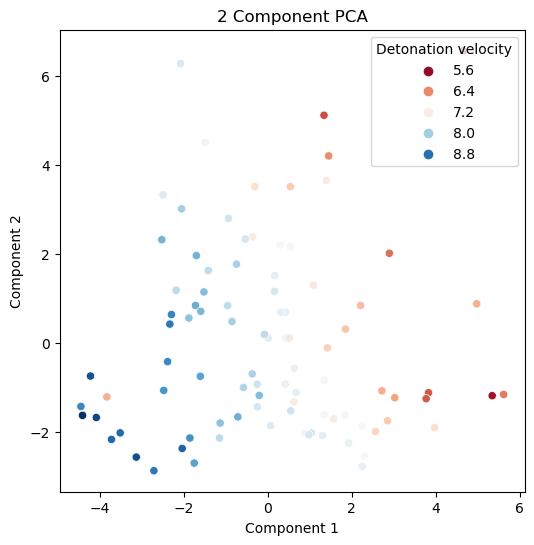

In [108]:
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=df['Detonation velocity'], palette = 'RdBu')

In [109]:
# Trying to decipher the meaning of the principal components
print("Meaning of the 2 components:")
eigenvectors = pca.components_ # The eigenvectors
print(eigenvectors.shape)
pd.DataFrame(eigenvectors, columns=scaled_data.keys())

Meaning of the 2 components:
(2, 24)


,Packing coefficient,Nitrogen density (g/cm3),Oxygen balance (fraction),Number of molecules in each primitive cell,Hydrogen bond area,strongest HB length,strongest HB strength,gasous N2,gasous H2O,gasous CO2,...,Strength of the weakest bond,Qmax: Maxmimum heat of explosion,Detonation pressure,Lattice energy,MW,LogP,Type of the weakest bond_N-C,Type of the weakest bond_N-N,Type of the weakest bond_O-C,Type of the weakest bond_O-N
0,-0.202383,-0.227919,-0.415323,-0.102526,0.223575,0.049721,-0.012239,-0.356460,-0.020607,-0.250853,...,0.036207,-0.034348,-0.385029,0.094538,0.083425,0.333157,0.028549,0.003776,0.006445,-0.001593
1,0.050063,0.336149,-0.052168,-0.081692,0.045915,-0.372361,0.401524,0.180744,0.091624,-0.269797,...,0.254480,-0.376496,-0.124191,0.304204,-0.144701,-0.174028,0.010502,0.008451,0.000473,0.004299


In [110]:
eigenvalues = pca.explained_variance_
print(pd.Series(eigenvalues))

0    5.095363
1    4.534269
dtype: float64


2
   variance_ratio
1        0.246937
2        0.219745


[Text(0.5, 0, 'Principal components'), Text(0, 0.5, 'Variance ratio')]

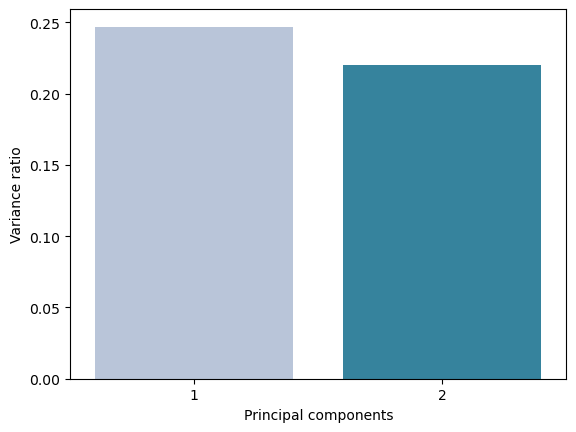

In [111]:
# How much does each component explain the original dataset.
print(len(pca.explained_variance_ratio_)) # Computed as eigenvalues/n_features
string = [s+1 for s in range(len(pca.explained_variance_ratio_))]
variance_ratio = pd.DataFrame(pca.explained_variance_ratio_, columns=['variance_ratio'], index=string)
print(variance_ratio.head())
ax = sns.barplot(data=variance_ratio, y='variance_ratio', x=variance_ratio.index, palette='PuBuGn')
ax.set(xlabel="Principal components", ylabel = "Variance ratio")

# K Means Clustering

[Text(0.5, 0, 'Number of clusters, k'), Text(0, 0.5, 'Inertia')]

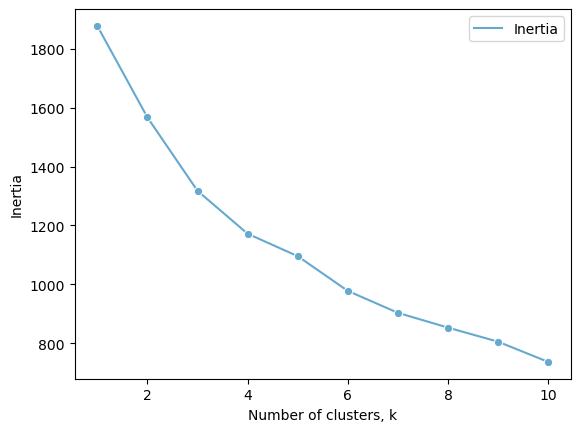

In [112]:
from sklearn.cluster import KMeans

inertia = []
# Creating 10 K-Mean models while varying the number of clusters (k)
# An elbow in the graph indicates the right number of clusters
for k in range(1,11):
    model = KMeans(n_clusters=k, init='k-means++', n_init = 10)
    # Fit model to samples
    model.fit(scaled_data)   
    # Append the inertia to the list of inertias
    inertia.append(model.inertia_)
inertia = pd.DataFrame({'Inertia':inertia}, index=range(1,11))
ax = sns.lineplot(data=inertia, marker="o", palette='PuBuGn')
ax.set(xlabel='Number of clusters, k', ylabel='Inertia')

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
#df_for_clust = df.drop(['SMILES', 'Number of molecules in each primitive cell', 'Type of the weakest bond', 'molecula', 'MorganFingerprint'], axis = 1)
kmeans.fit(scaled_data)
kmeans.cluster_centers_

/Users/sashaolshanova/opt/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 4.12797526e-01,  6.57764949e-01,  1.97388170e-01,
        -1.26684354e-01, -1.66494828e-01, -1.01294969e+00,
         9.95618119e-01,  5.29905104e-01,  1.24907768e-01,
        -2.28547115e-01, -1.71946544e-01, -1.45466451e-01,
        -1.47921887e-01, -6.66040034e-01,  7.90424266e-01,
        -7.14434510e-01,  5.93619611e-02,  3.77230021e-01,
        -3.32129629e-01, -3.14435983e-01,  5.48387097e-01,
         9.67741935e-02,  9.67741935e-02,  3.22580645e-02],
       [ 5.66380107e-01,  1.21285472e-01,  1.12384536e+00,
         8.38321749e-02, -2.31940685e-01,  5.15062455e-01,
        -6.18465170e-01,  5.58920328e-01,  3.27823207e-01,
         8.95325440e-01, -1.25560450e+00, -1.45466451e-01,
         5.00116855e-01,  7.49797925e-01, -7.87017685e-01,
         6.09469176e-01,  1.23529790e+00, -3.82564413e-01,
         5.41737864e-02, -8.81926025e-01,  2.85714286e-01,
         9.52380952e-02,  4.76190476e-02,  5.20417043e-18],
       [-6.00927870e-01, -7.07592858e-01, -6.77086450e

In [114]:
clusters = list(kmeans.labels_)
scaled_data['clusters'] = clusters
df['clusters'] = clusters

/Users/sashaolshanova/opt/anaconda3/envs/my-rdkit-env/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<AxesSubplot: title={'center': '2 Component PCA'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

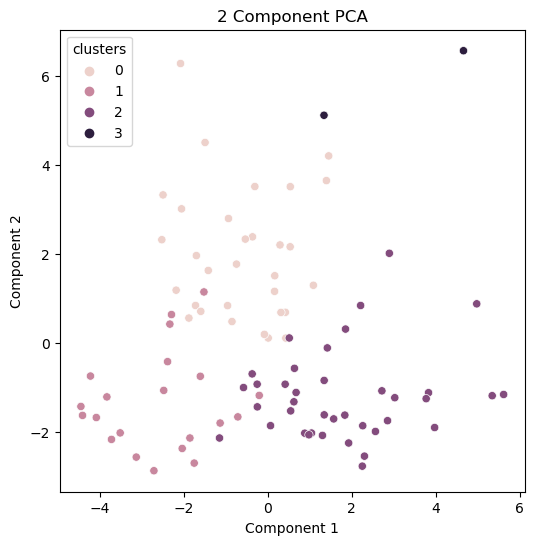

In [115]:
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1], hue=scaled_data['clusters'], cmap='rainbow')

In [116]:
zero_cluster = df[df['clusters'] == 0]
first_cluster = df[df['clusters'] == 1]
second_cluster = df[df['clusters'] == 2]
third_cluster = df[df['clusters'] == 3]

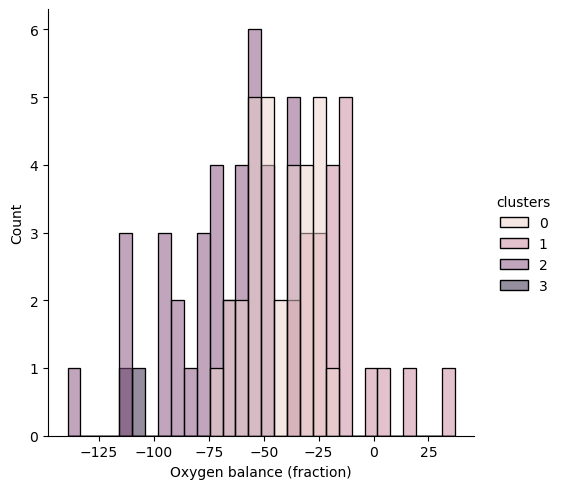

In [117]:
sns.displot(data=df, x='Oxygen balance (fraction)', hue='clusters', bins = 30)

<AxesSubplot: xlabel='Detonation velocity', ylabel='Hydrogen bond area'>

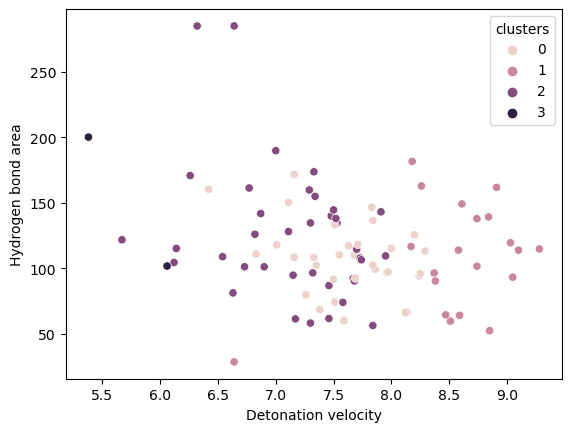

In [118]:
sns.scatterplot(x=df['Detonation velocity'], y=df['Hydrogen bond area'], hue=df['clusters'], data=df)

## Split data into training, development, and test set

In [119]:
scaled_data['Detonation velocity'] = list(df['Detonation velocity'].values)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(['clusters', 'Detonation velocity'], axis=1), 
                                                    scaled_data['Detonation velocity'], test_size=0.30, 
                                                    random_state=42)

## Linear Regression Model

In [121]:
# Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

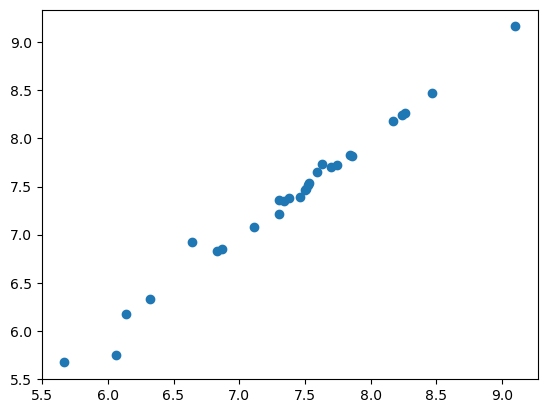

In [122]:
# Predictions of a Linear Regression Model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
lin_reg = predictions

In [123]:
coeff_df = pd.DataFrame(lm.coef_, X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Packing coefficient,0.003741
Nitrogen density (g/cm3),0.150216
Oxygen balance (fraction),0.221074
Number of molecules in each primitive cell,0.000814
Hydrogen bond area,0.008954
strongest HB length,-0.022853
strongest HB strength,-0.022924
gasous N2,24.491033
gasous H2O,23.183537
gasous CO2,27.434838


In [124]:
#Evaluation of a Linear Regression Model

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)/2000))

MAE: 0.04758556997075493
MSE: 0.007947121246915068
RMSE: 0.0019933791971066452


## Decision Tree Regression

In [125]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

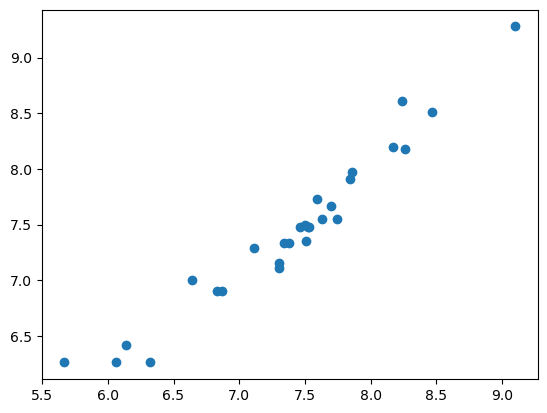

In [126]:
predictions = regressor.predict(X_test)
plt.scatter(y_test,predictions)
des_tree = predictions

In [127]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)/2000))

MAE: 0.1342857142857142
MSE: 0.03526428571428569
RMSE: 0.004199064521669421


## Random forest regression

In [128]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 600, random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600, random_state=0)

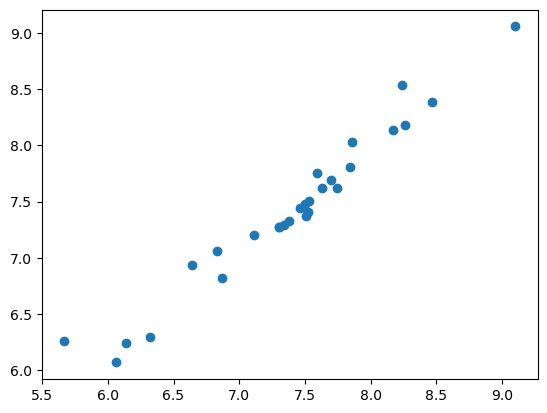

In [129]:
predictions = regressor.predict(X_test)
plt.scatter(x = y_test,y = predictions)
rand_for = predictions

In [130]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)/2000))

MAE: 0.1045035714285705
MSE: 0.026039504583332308
RMSE: 0.0036082893857985053


# Models validation

<AxesSubplot: xlabel='Detonation velocity'>

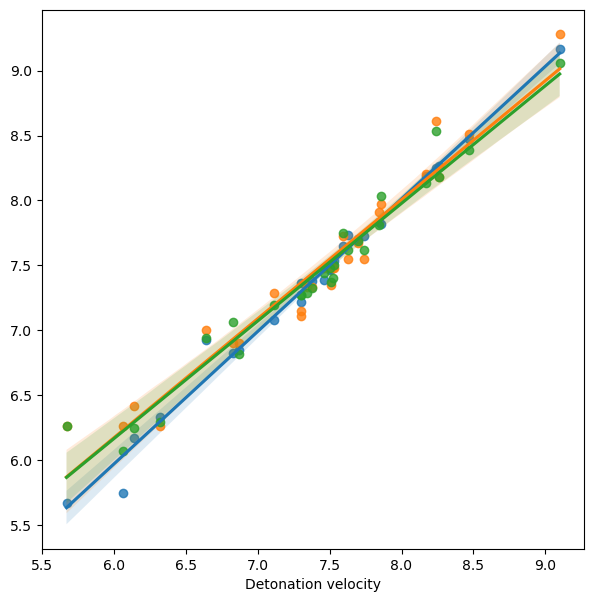

In [131]:
fig, axes = plt.subplots(figsize = (7,7))
sns.regplot(ax = axes, x=y_test,y= lin_reg)
sns.regplot(ax = axes, x=y_test,y= des_tree)
sns.regplot(ax = axes, x=y_test,y=rand_for)

(5.5, 9.5)

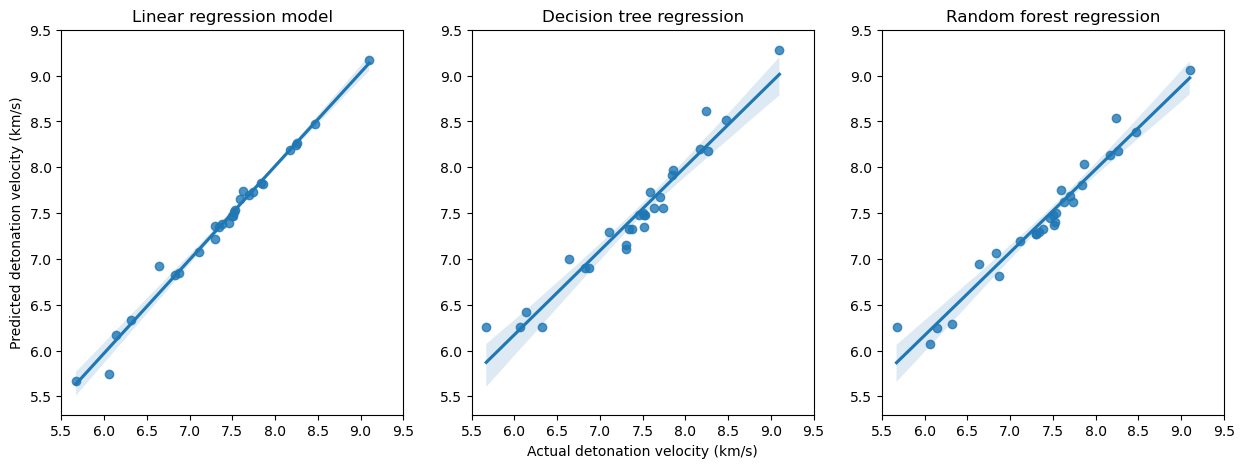

In [132]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.regplot(ax = axes[0], x=y_test,y= lin_reg)
sns.regplot(ax = axes[1], x=y_test,y= des_tree)
sns.regplot(ax = axes[2], x=y_test,y=rand_for)

axes[0].set_title('Linear regression model')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Predicted detonation velocity (km/s)')
axes[0].set_ylim([5.3, 9.5])
axes[0].set_xlim([5.5, 9.5])

axes[1].set_title('Decision tree regression')
axes[1].set_ylabel(' ')
axes[1].set_xlabel('Actual detonation velocity (km/s)')
axes[1].set_ylim([5.3, 9.5])
axes[1].set_xlim([5.5, 9.5])

axes[2].set_title('Random forest regression')
axes[2].set_ylabel(' ')
axes[2].set_xlabel(' ')
axes[2].set_ylim([5.3, 9.5])
axes[2].set_xlim([5.5, 9.5])
